In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def parabola(x, a, b, c, s):
    y = a*(x**2) + b*x + c
    y += s * np.random.randn(len(y))
    return y

In [7]:
def tr_matr(arr):
    tr = [[]]
    for i in range(len(arr[0])):
        for j in range(len(arr)):
            tr[i].append(arr[j][i])
        if i != len(arr[0])-1:
            tr.append([])
    return tr   

In [8]:
def opred_matr(arr):
    opr=0.
    if len(arr) == 2:
        opr=arr[0][0]*arr[1][1]-arr[0][1]*arr[1][0]
    else:
        for i in range(len(arr)):
            tmpi=i
            tmpOpr=1.
            for j in range(len(arr)):
                tmpOpr*=arr[tmpi][j]
                tmpi+=1
                if tmpi == len(arr):
                    tmpi=0
            opr+=tmpOpr
        for i in range(len(arr)):
            tmpi=i
            tmpOpr=1.
            for j in range(len(arr))[::-1]:
                tmpOpr*=arr[tmpi][j]
                tmpi+=1
                if tmpi == len(arr):
                    tmpi=0
            opr-=tmpOpr
    return opr 

In [9]:
def obr_matr(arr):
    opr=opred_matr(arr)
    if opr != 0:
        obr=[[]]
        tmp_arr = arr.copy()
        tmp_arr = tr_matr(tmp_arr)
        for i in range(len(tmp_arr)):
            for j in range(len(tmp_arr)):
                dop_arr = []
                for i2 in range(len(tmp_arr)):
                    for j2 in range(len(tmp_arr)):
                        if i2!=i and j2!=j:
                            dop_arr.append(tmp_arr[i2][j2])
                dop_arr2=[[dop_arr[0],dop_arr[1]],[dop_arr[2],dop_arr[3]]]
                obr.append(round(((-1)**(i+j+2))*(opred_matr(dop_arr2)),10))
        obr=obr[1:]
        for i in range(len(obr)):
            obr[i]=obr[i]/opr        
        obr=np.array(obr).reshape(3,3)         
        return obr
    else:
        raise Exception('ERROR:opredelitel = 0')

In [10]:
def arr3x3_x_vect1x3(arr,vect):
    vect_out = [0.,0.,0.]
    for i in range(3):
        for j in range(3):
            vect_out[i]+=arr[i][j]*vect[j]
    return vect_out[::-1]           

In [11]:
a=10.
b=2.
c=2.
s=10.1
XYp={'x':np.array(np.arange(1,250,9.9))}
XYp['y']=parabola(XYp['x'], a, b, c, s)

n=len(XYp['x'])
sumX = sum(XYp['x'])
sumY = sum(XYp['y'])
sumXY = 0.
sumXqrt = 0.
sum_Xqrt_Y = 0.
sumXqrt3 = 0.
sumXqrt4 = 0.

for i in range(len(XYp['y'])):
    sumXY += XYp['x'][i]*XYp['y'][i]
    sumXqrt += XYp['x'][i]**2
    sum_Xqrt_Y += (XYp['x'][i]**2)*XYp['y'][i]
    sumXqrt3 += XYp['x'][i]**3
    sumXqrt4 += XYp['x'][i]**4

for i in range(len(XYp['y'])):
    print('point ',i,'[X=',XYp['x'][i],',Y=',XYp['y'][i],']')

print('\nsumX ',sumX)
print('sumY ',sumY)
print('sumXY ',sumXY)
print('sumXqrt ',sumXqrt)
print('sum_Xqrt_Y ',sum_Xqrt_Y)
print('sumXqrt3 ',sumXqrt3)
print('sumXqrt4 ',sumXqrt4)

point  0 [X= 1.0 ,Y= 6.424206720157334 ]
point  1 [X= 10.9 ,Y= 1210.9960616225594 ]
point  2 [X= 20.8 ,Y= 4363.817691911604 ]
point  3 [X= 30.700000000000003 ,Y= 9481.415282061833 ]
point  4 [X= 40.6 ,Y= 16565.699765685844 ]
point  5 [X= 50.5 ,Y= 25593.13764855515 ]
point  6 [X= 60.400000000000006 ,Y= 36612.6220802404 ]
point  7 [X= 70.3 ,Y= 49584.29854001588 ]
point  8 [X= 80.2 ,Y= 64472.01000136045 ]
point  9 [X= 90.10000000000001 ,Y= 81379.7413538542 ]
point  10 [X= 100.0 ,Y= 100207.35564147048 ]
point  11 [X= 109.9 ,Y= 121001.22743102284 ]
point  12 [X= 119.80000000000001 ,Y= 143760.65486726866 ]
point  13 [X= 129.70000000000002 ,Y= 168474.64564615255 ]
point  14 [X= 139.6 ,Y= 195169.2080339712 ]
point  15 [X= 149.5 ,Y= 223804.51105145755 ]
point  16 [X= 159.4 ,Y= 254394.89834251328 ]
point  17 [X= 169.3 ,Y= 286961.918609682 ]
point  18 [X= 179.20000000000002 ,Y= 321467.6851357587 ]
point  19 [X= 189.1 ,Y= 357954.73653629405 ]
point  20 [X= 199.0 ,Y= 396411.3724923013 ]
point  21 [

In [12]:
obr_m = obr_matr([[n,      sumX,    sumXqrt ],
                  [sumX,   sumXqrt, sumXqrt3],
                  [sumXqrt,sumXqrt3,sumXqrt4]])
vect = [sumY,
        sumXY,
        sum_Xqrt_Y]

abc_koef_parabola = arr3x3_x_vect1x3(obr_m,vect)
print(abc_koef_parabola)

[9.999831472322569, 2.0454396496497793, -1.11411900119856]


In [13]:
XYf = {'x':XYp['x'].copy(),
       'y':[(abc_koef_parabola[0]*(x**2)+abc_koef_parabola[1]*x+abc_koef_parabola[2]) for x in XYp['x']]}
print(XYf)

{'x': array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
        90.1, 100. , 109.9, 119.8, 129.7, 139.6, 149.5, 159.4, 169.3,
       179.2, 189.1, 199. , 208.9, 218.8, 228.7, 238.6, 248.5]), 'y': [10.931152120773788, 1209.2611504066283, 4367.758113897154, 9486.422042592349, 16565.252936492216, 25604.25079559675, 36603.41561990596, 49562.74740941982, 64482.246164138385, 81361.9118840616, 100201.74456918947, 121001.74421952204, 143761.91083505927, 168482.24441580116, 195162.7449617477, 223803.41247289893, 254404.24694925486, 286965.24839081545, 321486.4167975807, 357967.7521695505, 396409.2545067251, 436810.92380910437, 479172.76007668837, 523494.763309477, 569776.9335074704, 618019.2706706681]}


Text(1.0, 618014.5681731538, 'y = (10.0)x²+(2.045)x+(-1.114)')

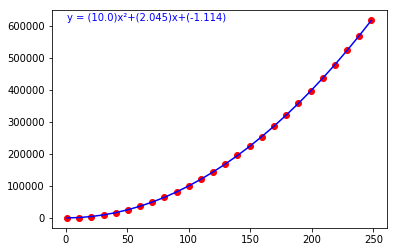

In [14]:
plt.plot(XYp['x'],XYp['y'],'ro')
plt.plot(XYf['x'],XYf['y'],'b')
plt.text(min(XYp['x']),max(XYp['y']),'y = ('+str(round(abc_koef_parabola[0],3))+')x²+('+str(round(abc_koef_parabola[1],3))+')x+('+str(round(abc_koef_parabola[2],3))+')',color='blue')